In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [5]:
pred = tf.add(tf.mul(X, W), b)

In [6]:
cost = tf.reduce_sum(tf.pow(pred-Y,2)/(2*n_samples))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.305867732
Epoch: 0100 cost= 0.279430062
Epoch: 0150 cost= 0.256045073
Epoch: 0200 cost= 0.235360339
Epoch: 0250 cost= 0.217064112
Epoch: 0300 cost= 0.200880304
Epoch: 0350 cost= 0.186565638
Epoch: 0400 cost= 0.173903927
Epoch: 0450 cost= 0.162704378
Epoch: 0500 cost= 0.152798280
Epoch: 0550 cost= 0.144036308
Epoch: 0600 cost= 0.136286348
Epoch: 0650 cost= 0.129431546
Epoch: 0700 cost= 0.123368546
Epoch: 0750 cost= 0.118005931
Epoch: 0800 cost= 0.113262810
Epoch: 0850 cost= 0.109067671
Epoch: 0900 cost= 0.105357237
Epoch: 0950 cost= 0.102075517
Epoch: 1000 cost= 0.099173024
Optimization Finished!
Training cost= 0.099173 



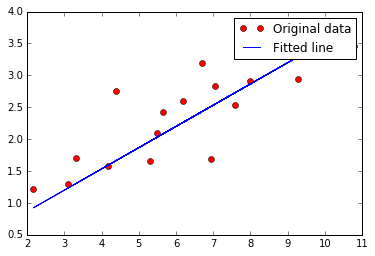

In [8]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()